In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [6]:
df = pd.read_csv('/Users/whaight/Downloads/DS/nfl_draft.csv')

In [7]:
print( df.columns )

Index(['Player_Id', 'Year', 'Rnd', 'Pick', 'Tm', 'Player', 'Pos',
       'Position Standard', 'First4AV', 'Age', 'To', 'AP1', 'PB', 'St',
       'CarAV', 'DrAV', 'G', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD',
       'Pass_Int', 'Rush_Att', 'Rush_Yds', 'Rush_TDs', 'Rec', 'Rec_Yds',
       'Rec_Tds', 'Tkl', 'Def_Int', 'Sk', 'College/Univ', 'Unnamed: 32'],
      dtype='object')


In [8]:
altdf = df
altdf['CarAV'] = altdf['CarAV'].fillna(altdf['First4AV'])
#altdf['CarAV'] = altdf['CarAV'].apply( lambda x: df['First4AV'][x.name] if isinstance(x, float) else x )

# if x == np.nan:
#     return df['First4AV'][x.name]
# else:
#     return x 
print(len(altdf['CarAV']))
print(len(altdf['CarAV'].dropna()))

8435
8435


In [9]:
altdf['CarAV'][1].name

AttributeError: 'numpy.float64' object has no attribute 'name'

In [10]:
df = df.dropna(subset = ['CarAV', 'First4AV'], how='any')
len(df)

8435

In [11]:
x = df[ 'First4AV' ]
y = df[ 'Rnd' ].apply( lambda x: x + np.random.uniform(-.5, .5))

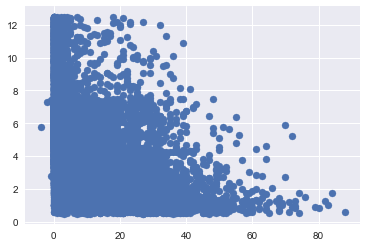

In [12]:
plt.scatter( x, y )
plt.show()

In [13]:
df[ 'First4AV' ].unique()

array([13,  9,  0,  7,  8,  1,  6,  3,  5, 11,  2,  4, 12, 19, 17, 21, 16,
       10, 24, 31, 22, 14, 18, 15, -1, 20, 27, 32, 26, 28, 30, 33, 48, 34,
       45, 57, 37, 38, 25, 23, 29, 49, 70, -4, 83, 63, 69, 58, 54, 88, 41,
       39, 40, 36, 42, 60, 61, 35, 46, 50, 51, 72, 65, 47, 52, 43, 56, 73,
       53, 66, 79, 68, 44, 64, 62, 80, -2, 59, 71, 76, 74, 67, 82, 55, 84])

In [14]:
# The plotting drill of unit 1 requires the student to find and explore a data set by plotting various variables in
# various ways, using the tools provided in mathplotlib and Seaborn.  I elected to continue with the Kaggle data set
# of individual NFL players drafted between 1985 and 2015.  Two of the variables included in that set, CarAV and
# First4AV, are based on Doug Drinen's "Approximate Value" rating for players, used by pro-football reference, and
# broadly recognized across football media (http://www.sports-reference.com/blog/approximate-value-methodology/).
# It should be noted that the AV rating awards players on the basis of in-game performance.  Team achievement is
# recognized, and individual AV ratings are driven up when the player participates in, say, an offensive drive
# culminating in a touchdown.  Skill position players also enhance their AV ratings by throwing a TD pass or rushing
# for a big gain.  The AV rating seeks to reward players for tangible contributions to the full team effort of
# winning regular season (and postseason) professional football games.

# CarAV records the AV rating accumulated over the players' career, whereas First4AV records the AV rating for just
# the first four years of a player's career.  It should be noted here (somewhere) that as of the time these data
# were extracted, current NFL players who had played for four or fewer years only had a First4AV rating, as the
# opportunity remained to record a higher (or lower) CarAV rating once the career was done and in the books.

# I produced the graphic below (basically) as part of the drill, and immediately found it fascinating:

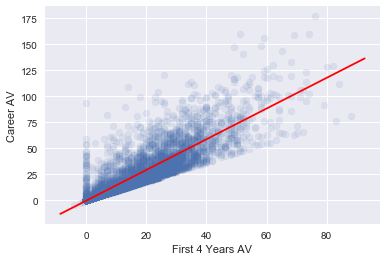

In [15]:
x = altdf[ 'First4AV' ]
y = altdf[ 'CarAV' ]
plt.scatter( x, y, alpha=0.1 )
plt.xlabel("First 4 Years AV")
plt.ylabel("Career AV")

axes = plt.gca()
m, b = np.polyfit(x, y, 1)
X_plot = np.linspace(axes.get_xlim()[0],axes.get_xlim()[1],100)
plt.plot(X_plot, m*X_plot + b, '-', color = 'red')

plt.show()

In [16]:
# Professional athletics contains thousands of stories of aspiration, ambition, athletic talent, achievement,
# disappointment, failure, success, re-commitment, reversal, injury, recovery, inspiration, and so on.  This graphic
# speaks to each of these stories.  I set alpha to a low value here to emphasize the concentration of individuals to 
# the lower left of the plot, particularly along that prominent linear cutoff.  These are the guys who established
# a substellar First4AV rating, and failed to improve it during seasons 5, 6, and so on.  It appears that this
# accounts for the bulk of the players in the dataset.

# Note the prominent line of dots crawling up the vertical line First4AV = 0.  I don't know how many individuals sit
# on (0, 0), but this is the zone of heartbreak and disappointment.  These players never managed to achieve a positive
# AV rating during the first four years of the career, nor did they add to that AV rating during subsequent seasons.
# Was it because they were perpetually relegated to the bench, and never saw any game action?  Or did they play some,
# but never on any offensive drive resulting in a score?  Or were they part of a pathologically porous defense which
# habitually yielded touchdowns to the opposition?  The players whose dots sit above zero, however, are the
# representatives of hope.  These players must have played more than four years, because they were able to improve a
# First4AV rating of 0 to a positive CarAV rating.  Their stories testify that perseverence beyond years of non-
# contribution can result in a professional football career of positive contribution on the field.

# The first impression one takes from this scatterplot is that it looks like the standard oval of linearly related 
# bivariate data, but with the left side and bottom sharply cut off along a line.  In the presence of such a scatter
# plot, as statisticians, we salivate like the dog of Pavlov and are compelled to cook up a regression line.

# To what extent is First4AV predictive of ultimate CarAV?  We answer that in the calculations below.  Scipy's stats
# package courteously find a p-value of a test whose null hypothesis is that the slope \alpha of the regression line
# for all such data (not just our sample here) is zero.  Note that that p-value is reported as zero (though it
# certainly must be positive -- just microscopically small).  Our data give a regression slope of about 1.476.  Painting
# in broad strokes, what this says is that positive First4AV ratings are predicted to improve by a factor of about 
# 1-1/2 by the time the career is finished.

In [17]:
xMean = np.mean( df[ 'First4AV' ])
xSD   = np.std( df[ 'First4AV' ])
yMean = np.mean( df[ 'CarAV' ])
ySD   = np.std( df[ 'CarAV' ])

print(xMean)
print(xSD)
print(yMean)
print(ySD)

9.927089508002371
13.13399170100432
14.445643153526971
21.448113117462785


In [18]:
x = altdf[ 'First4AV' ]
y = altdf[ 'CarAV' ]

stats.pearsonr(x, y)

# slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )

(0.90387837284274464, 0.0)

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )

In [20]:
print(slope)
print(intercept)
print(r_value)
print(p_value)
print(std_err)

1.47605435015
-0.207280499131
0.903878372843
0.0
0.00760731607409


In [21]:
# So, young players who manage to make a positive contribution to the team as measured by AV rating are well encouraged
# to pay attention to their coaching;  the data predict they can improve as players.

# OK, so now we've hit on the issue underlying this particular scatterplot.  What is the practical difference between
# fresh players just drafted into the league, and veteran players who've endured multiple seasons of NFL-style war?
# Coaching.  Perennial pro-bowl and future HOF-er Joe Thomas recently opined that it takes anywhere from two to seven
# years for a college player to develop into a bona-fide NFL player.  NFL teams shepherd players through this
# transition, from the much simpler college game to the much faster professional game, by hiring large staffs of
# professional coaches, assistant coaches, coordinators and trainers to work often one-on-one with the players to
# optimize their on-field performance.  In this sense, we are set up to analyze our data in a matched-pairs fashion,
# as a pre-treatment (First4AV), post-treatment (CarAV) experimental design, to see what positive effect (if any) the
# treatment (coaching) holds.

In [22]:
# This isn't perfect, for many reasons.  First, the First4AV rating takes into account the first four years of a
# player's career.  Many players don't last four years, or peak during the first four years.  I'll venture a guess that
# that's the reason we end up with such a dark 'y = x' line in the scatterplot.  Perhaps if we used a First3AV or
# First2AV for the explanatory variable, we'd witness more players above the y = x line.

# For another thing, the CarAV rating also takes into account players' performances during the first four years.  We'd
# get a better measure of coaching effectiveness if we could examine 'AVafter2' vs 'First2AV', a "year 2 split",
# or a "year 3 split".  If the goal is to optimize coaching effectiveness, you'll want to examine the
# "year n split" for n = 1, 2, 3, 4, and so on.

In [23]:
# Another imperfection lies in the monolithic way I've spoken about coaching so far.  Not all coaching is created
# equal.  There are different coaching techniques -- and, more importantly, there are different coaches.  It's just
# like teaching;  it really cannot be boiled down to mere technique, it's dependent on the chemistry between players
# and the individual coach.  We are human beings and we respond to human beings.  For this reason, examination of year
# n splits for individual coaches could be used to measure coaching effectivenes, and so used in making staffing
# decisions.  It seems best to me that we not confound the effectiveness of the human coaches with the coaching
# technique they are charged to employ.  It is certainly possible to test those techniques, but we ask for statistical
# pandemonium by not isolating either the coach or the technique.  I'm opting for the former.

In [24]:
# Every football team faces the difficulty of educating its young players fresh from college and turning them into
# effective players at the professional level.  Is coaching effective in this endeavor?  I'm going to assert the
# answer is yes, and propose to use AV ratings to show this.

# It is essential to define precisely what is meant by "coaching."  I do not wish to go too deep in the weeds for the
# purposes of this study, and so will use an exceedingly broad definition of the term.  I am envisioning this kind of
# study being run by an individual NFL football team for the purpose of self-assessment.  So, I would include all
# phases of the player preparation process, as we are currently configured.  Coaching includes instruction by coaches
# on the field in both football fundamentals (blocking, tackling, running, catching, protecting the football and so
# on), and position specific instruction, such as throwing and reading defenses (for quarterbacks), or how to angle
# kicks (for kickoff specialists and punters).  It also includes other activites, such as weight training and diet
# adjustment.  It would be too difficult to tease out all the individual contributions to player improvement, so we
# take a "kitchen sink" approach (for now).

In [25]:
# So, here's the research proposal:

# The problem:
#     How do we turn college football players into professional football players capable of excelling in the NFL?

# The potential solution:
#     We will coach them, and measure the change in game performance via the aggregate AV rating.

# The method of testing the solution:
#     For each player for which an established AV rating for the earlier years of the career is available, we record
#     these as PrevAV (note that this means rookies will not be a part of this study).  Over the course of the season,
#     contributing data are gathered, and a SeasonAV rating is calculated.  We run a matched pairs experiment, and
#     apply a one-sample t-test to individual differences DeltaAV = SeasonAV - PrevAV.

# If we witness no statistically significant AV increase, we'll change the way we coach.  Exactly what changes we'll
# make cannot be dictated from so general a study.  This is a weakness in the design as currently configured.

In [ ]:
# Other Design Criticisms:

# The AV rating is a good measure of how effectively your players are playing at the professional level;  but it is so
# general that noting a failure to significantly improve the AV rating of your players also fails to suggest a remedy.
# Every aspect of this study cries out for another, more skill-specific study, so that we can target our efforts in
# seeking to improve in areas where we're failing.

# There is no control group against which we can compare our coaching regimen.  To be fair, in this context there
# cannot be such a control group.  No NFL team has the time, money, or personnel resources to devote to setting up
# and maintaining a control group to receive no treatment.  It may be possible to use year-to-year AV ratings for
# mid-career veterans to simulate a control;  these players are seasoned veterans at the peak of effectiveness, and
# are unlikely to show much change in AV rating, unless they are subject to a coaching regimen radically different
# from what they've already experienced.

# By necessity we've adopted a broad definition of "coaching."  The obvious criticism that the many variables which
# affect a player's performance are confounded must be noted.  Did the player's AV rating improve over the course of
# the season because of the additional time spent on the field in tackling drills, or the increased workout intensity
# in the weight room, or the performance enhancing diet ordered by the team nutritionist?  There is no way of telling
# from this study.

# I was inspired to set up this particular study, again, from the scatterplot above.  But that graphic includes all
# players drafted into the league between 1985 and 2015.  To emphasize via understatement:  that's a lot of players.
# Here I'm proposing to measure year to year AV measurements based on many fewer players.  Each year the draft provides
# each team with approximately seven new players, in addition to which about a dozen undrafted free agents (UDFAs,
# also fresh out of college) also join the team.  Each team is subject to the churn of which I speak through the
# process of free agency.  Each team is required, after looking at about 90 players through summer training camp and
# the pre-season games, to whittle their rosters to a final count of 53.  Of those, a fair number are rookies which
# cannot be used in our study (no AV rating for last season).  Others may be freshly arrived free agents, who will have
# an established AV rating, but you may not want to use it if the background is sufficiently different from our current
# coaching regimen.  If we're lucky, we can run our study on the basis of a sample of size n = 40, which should be
# large enough for a one-sample t.  Still, it's an issue of which we need to be cognizant.

# As an alternative, one could run a t-test based on regression line slopes stuck through bivariate data, as I did
# above.  Is that a better way to go?  I would think not, as matched pairs data speak so directly to the issue at hand.
# But I'm open minded and sensitive to whatever virtues might inhabit the alternative approach.

# Surely there is at least one obvious criticism which is glaringly absent this report.

# I see the directions say "... a quick RFC ...," so I'll stop now.